In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


# Marketing strategy by customer segmentation
This project requires to develop a customer segmentation to define marketing strategy. 

The sample sataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.

**Content of this Kernel:**

* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

# Table of contents

#### 1. [Data preprocessing](#data-preprocessing)
#### 2. [EDA](#eda)
#### 3. [PCA](#pca)
#### 4. [K-Means](#kmeans)

<a id = "data-preprocessing"></a>
# Data preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

#### Explanation of columns

* CUST_ID : Identification of Credit Card holder (Categorical) <br>
* BALANCE : Balance amount left in their account to make purchases <br>
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) <br>
* PURCHASES : Amount of purchases made from account<br>
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go<br>
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment<br>
* CASH_ADVANCE : Cash in advance given by the user<br>
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br>
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br>
* PURCHASES_TRX : Numbe of purchase transactions made<br>
* CREDIT_LIMIT : Limit of Credit Card for user<br>
* PAYMENTS : Amount of Payment done by user<br>
* MINIMUM_PAYMENTS : Minimum amount of payments made by user<br>
* PRCFULLPAYMENT : Percent of full payment paid by user<br>
* TENURE : Tenure of credit card service for user<br>

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Drop one account with no Credit Limit
df.dropna(subset=["CREDIT_LIMIT"], inplace=True)

<a id = "eda"></a>
# EDA

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
len(df.columns)

18

In [12]:
num_vars = ['BALANCE',  'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [13]:
len(df[num_vars].columns)

14

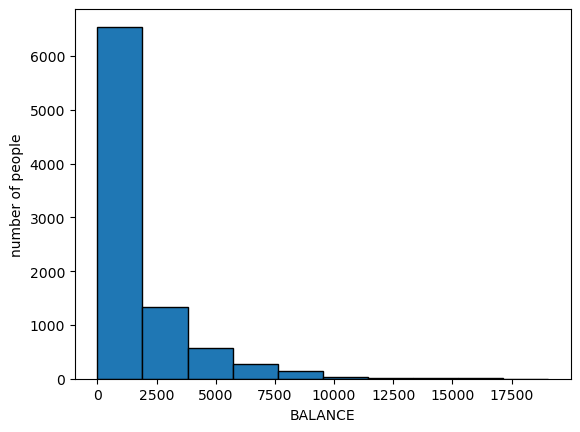

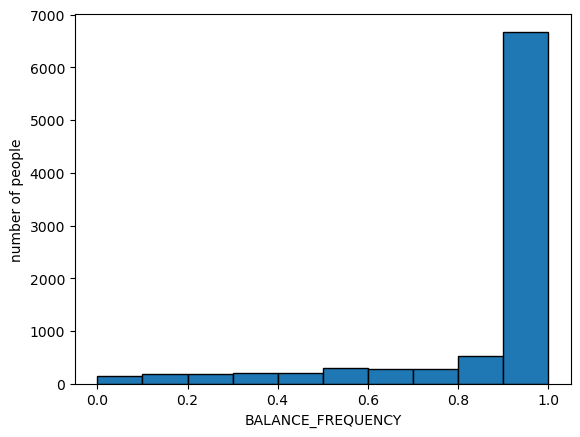

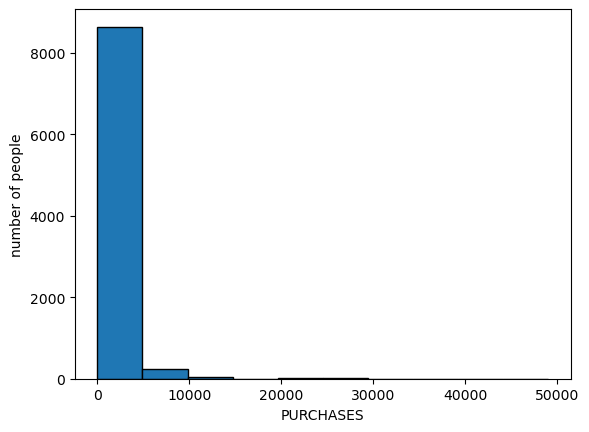

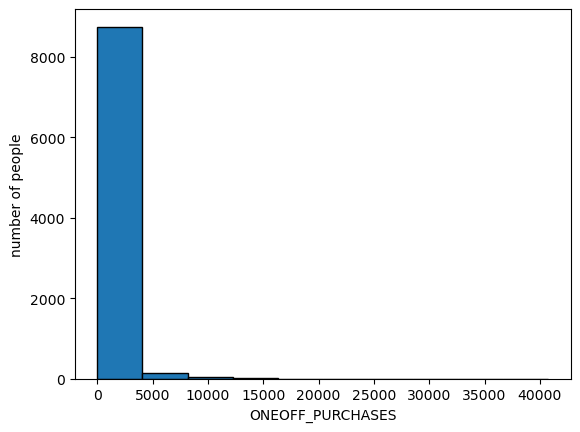

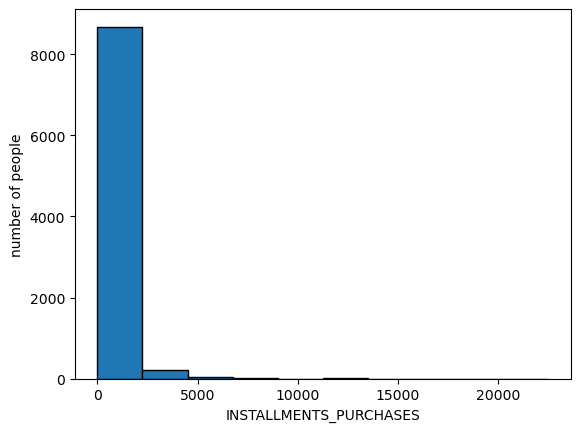

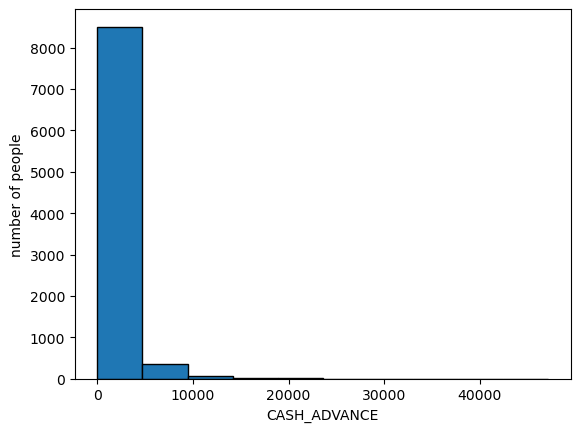

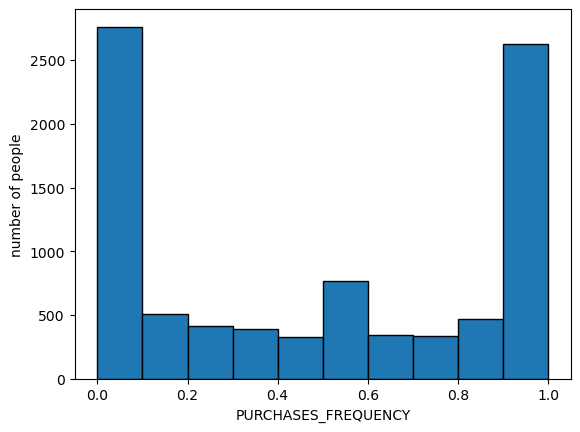

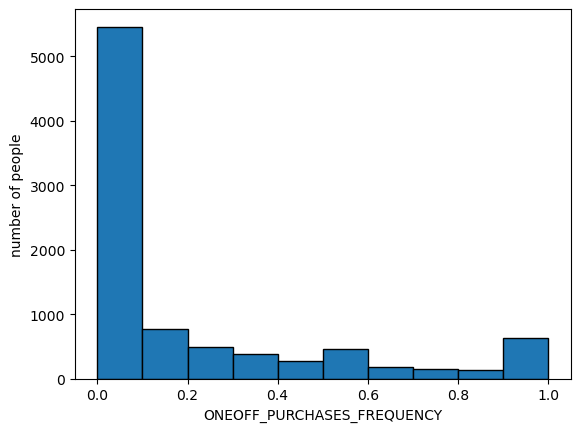

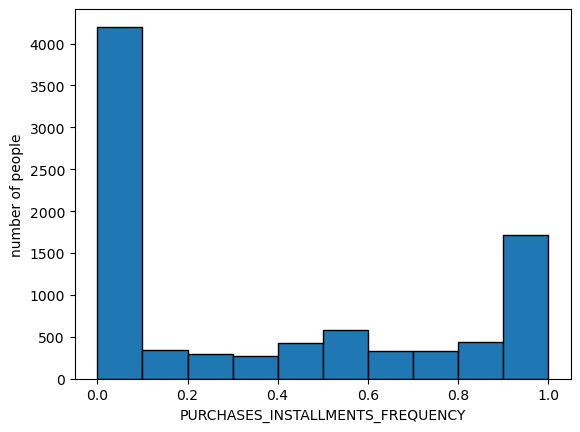

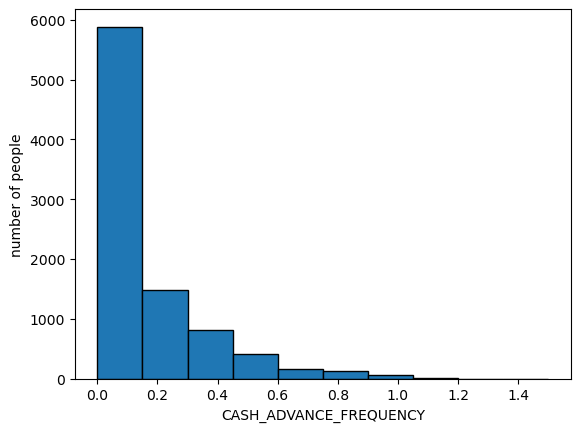

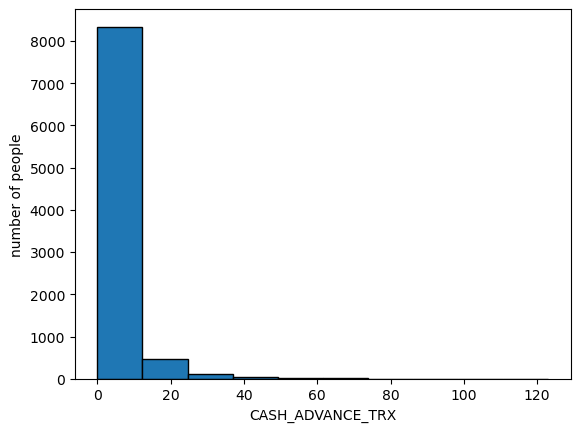

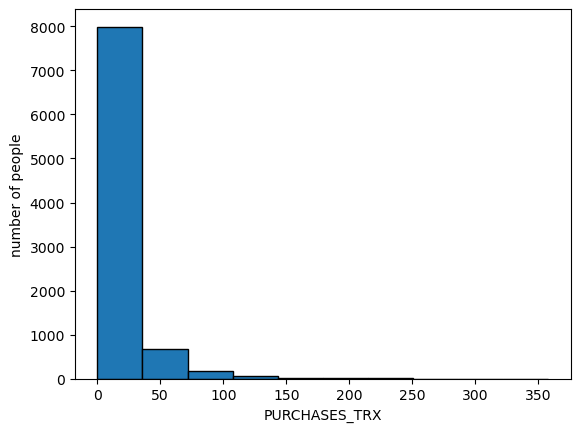

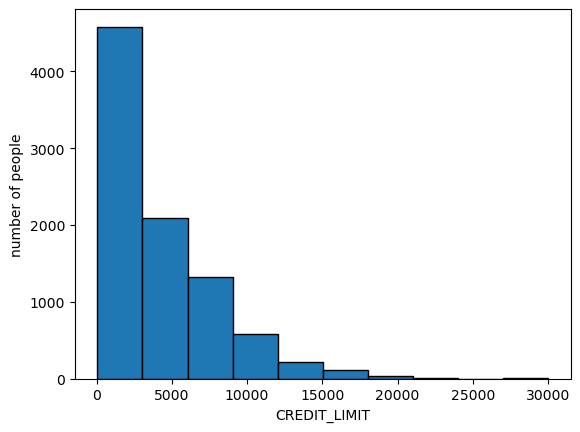

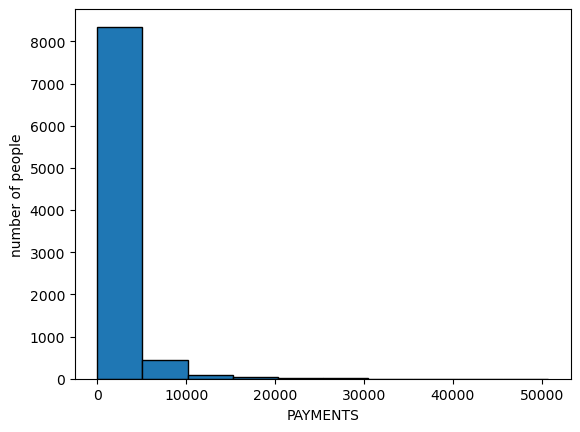

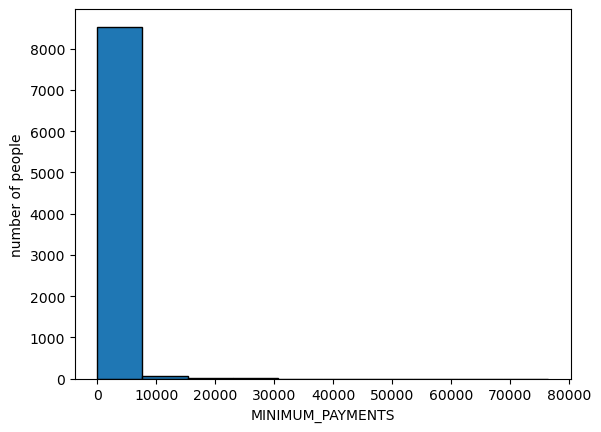

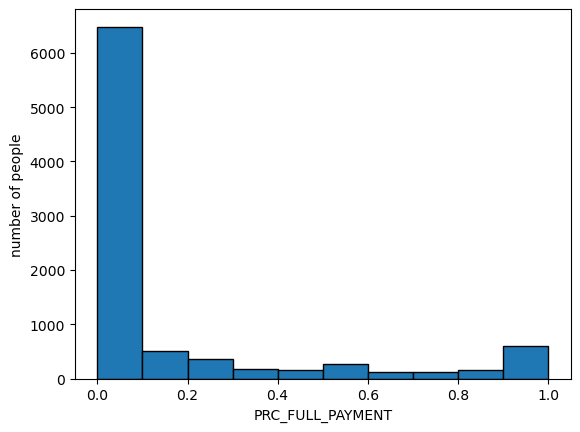

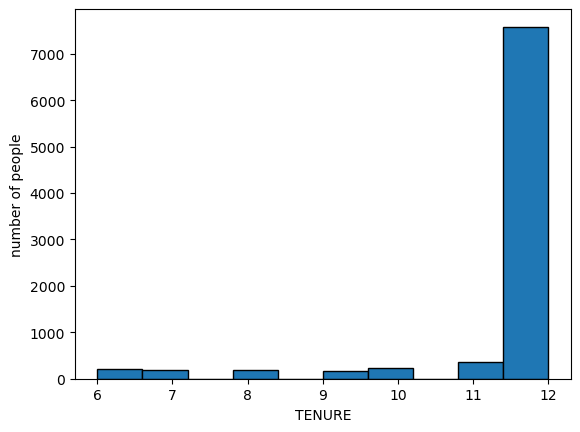

In [14]:
# Histograms for all non-binary vars 

for i in df.loc[:, df.columns != 'CUST_ID']:
    plt.hist(df[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

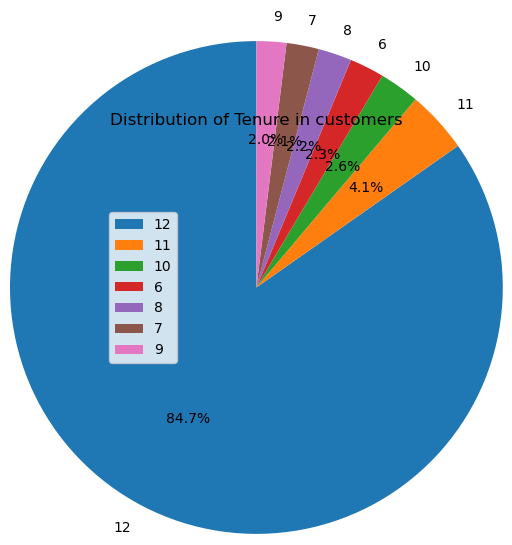

In [15]:
# Distribution of Tenure in customers

plt.figure(figsize=(6,4))
plt.pie(df["TENURE"].value_counts().values, labels=df["TENURE"].value_counts().index, autopct='%1.1f%%', startangle=90, radius=2)
plt.legend(df["TENURE"].value_counts().index, ncol=1, loc="center left")
plt.title("Distribution of Tenure in customers")
plt.show()

Most credit card users in the data had a tenure (length of time customer has held a credit card) of 12 months.

<a id="correlationan"></a>
## Correlation analysis

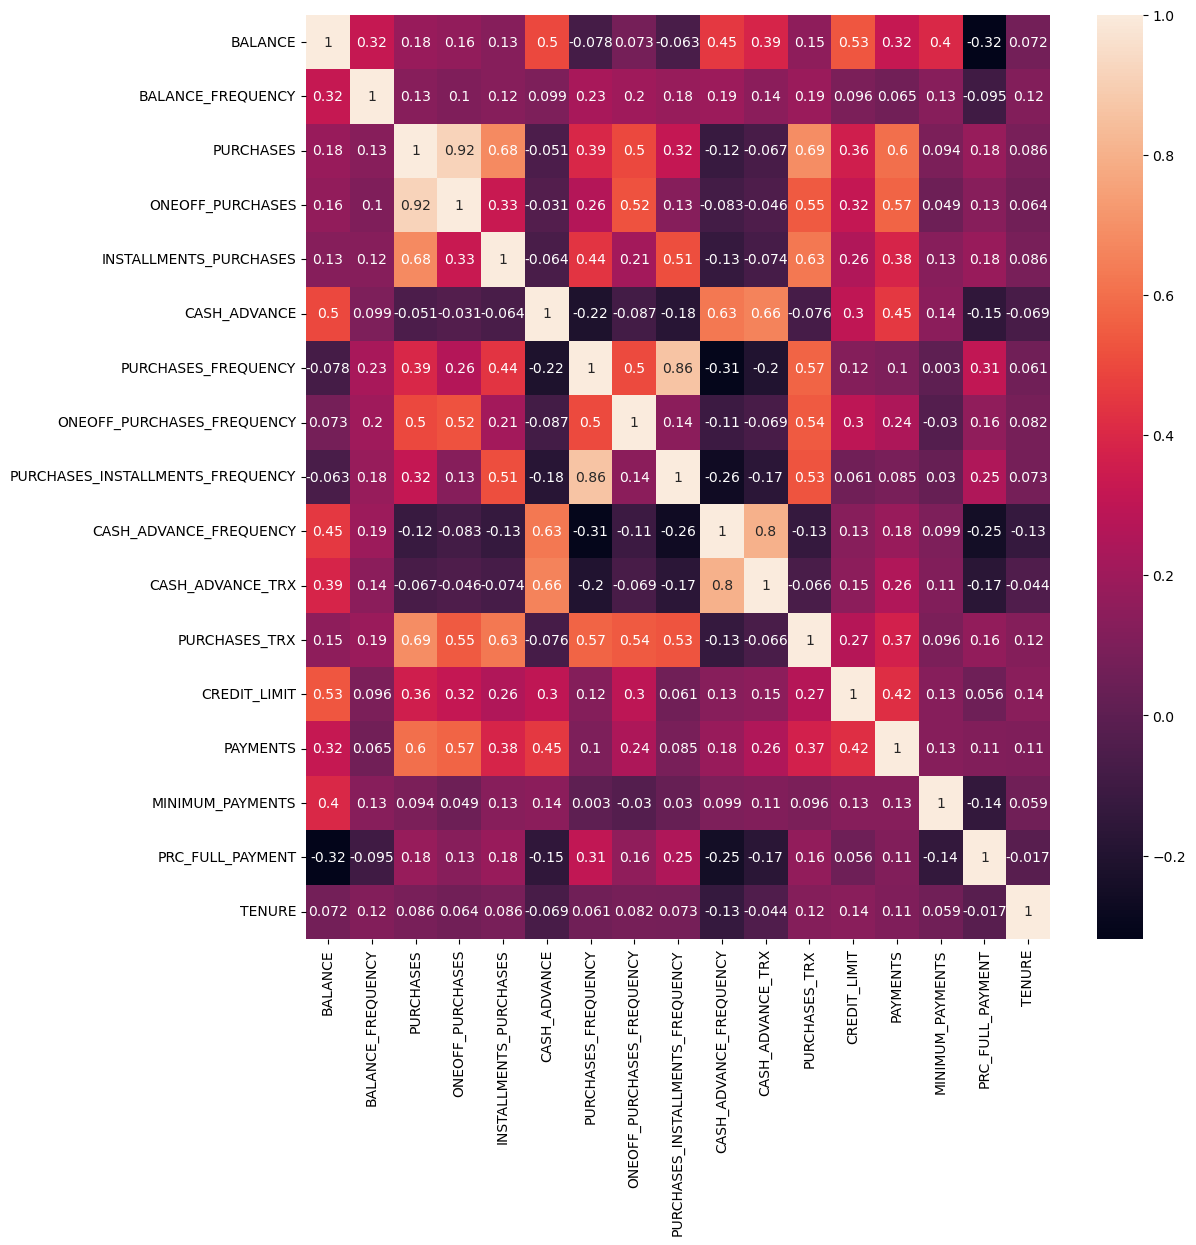

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

There are some correlated features there. There are many ways to handle this. For example ONE_OFF PURCHASES and INSTALLMENTS_PURCHASES correlates positive with PURCHASES, which intuatively makes sense. 

Later dimensionality reduction and will be used to reduce the dimension within the dataset.

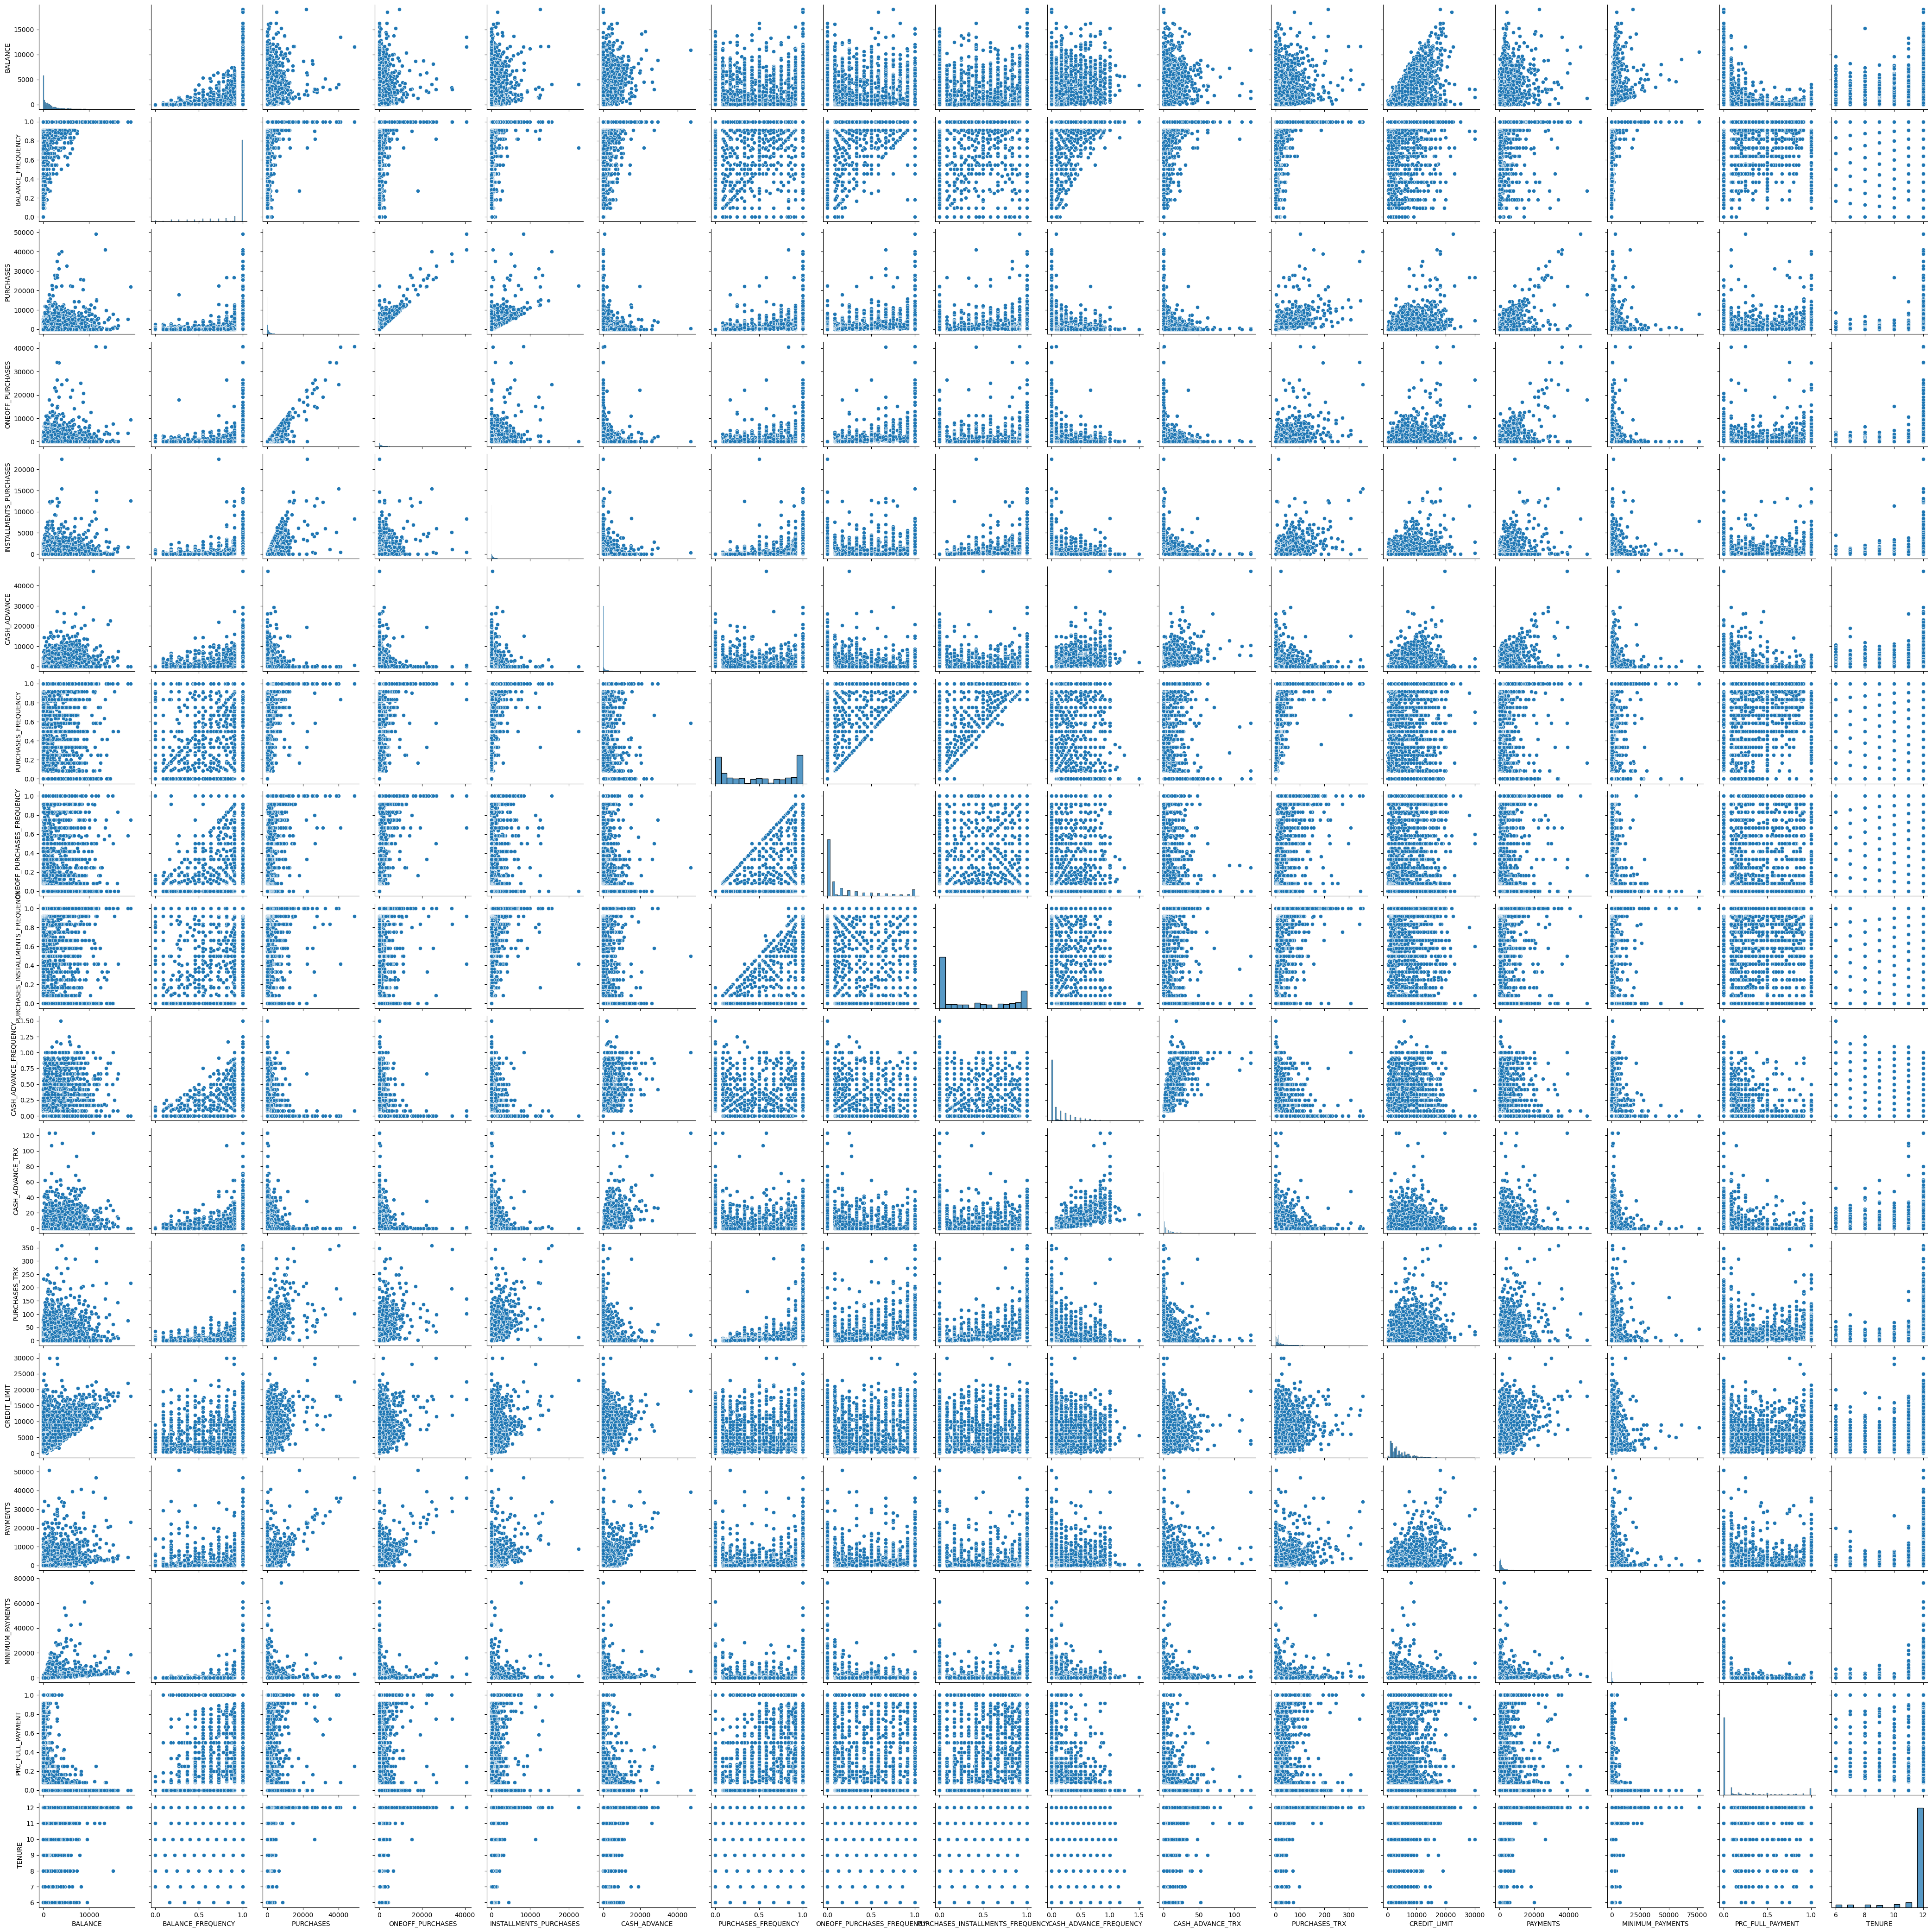

In [17]:
#pairplot to show plots against each variable
sns.pairplot(df.loc[:])
plt.show()

##### Drop unnecessary Cust_Id col

In [18]:
# --- Dropping `CUST_ID` Column ---
df = df.drop(['CUST_ID'], axis=1)

##### Impute null values 

In [19]:
#use simpleimputer to impute using the median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))

##### Scaling values

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[1]

array([ 0.78685815,  0.1340494 , -0.4695839 , -0.35695651, -0.45460688,
        2.6054375 , -1.22192823, -0.67871619, -0.91708951,  0.57394905,
        0.11003155, -0.59184052,  0.68860056,  0.81854607,  0.0974534 ,
        0.2341587 ,  0.36054128])

<a id="pca"></a>
# Principal Component Analysis (PCA)

Principal component analysis (PCA) is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible. By using PCA before applying clustering algorithm, it allows to reduces dimensions, data noise, and decrease computation cost. In this notebook, the number of features will be reduced to 2 dimensions so that the clustering results can be visualized.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)

In [22]:
pca_df = pd.DataFrame(principal_comp, columns=["pca1", "pca2"])
pca_df

pca1      pca2
0    -1.683767 -1.072570
1    -1.134846  2.508740
2     0.969056 -0.383483
3    -0.888421  0.004393
4    -1.600261 -0.684049
...        ...       ...
8944 -0.362123 -2.012991
8945 -0.580364 -1.675245
8946 -0.928480 -1.807725
8947 -2.337439 -0.653448
8948 -0.557580 -0.400282

[8949 rows x 2 columns]

In [23]:
pca_variance = pca.explained_variance_ratio_

In [24]:
print(f"Explained variance ratio: PCA1: {round(pca_variance[0]*100,2)}; PCA2: {round(pca_variance[1]*100,2)}")
print(f"Total explained variance by components: {round((pca_variance[0] + pca_variance[1])*100,2)}")

Explained variance ratio: PCA1: 27.3; PCA2: 20.31
Total explained variance by components: 47.61


#### Loadings


In [25]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns)
loading_matrix

PC1       PC2
BALANCE                           0.218977  0.750506
BALANCE_FREQUENCY                 0.259244  0.244160
PURCHASES                         0.886668  0.074549
ONEOFF_PURCHASES                  0.746141  0.115218
INSTALLMENTS_PURCHASES            0.725510 -0.035515
CASH_ADVANCE                     -0.049309  0.815874
PURCHASES_FREQUENCY               0.692024 -0.355199
ONEOFF_PURCHASES_FREQUENCY        0.634417 -0.034395
PURCHASES_INSTALLMENTS_FREQUENCY  0.591334 -0.332376
CASH_ADVANCE_FREQUENCY           -0.190937  0.806759
CASH_ADVANCE_TRX                 -0.103863  0.779840
PURCHASES_TRX                     0.841492 -0.037345
CREDIT_LIMIT                      0.456460  0.442426
PAYMENTS                          0.574011  0.477181
MINIMUM_PAYMENTS                  0.136207  0.314204
PRC_FULL_PAYMENT                  0.284015 -0.353205
TENURE                            0.174238 -0.008131

<a id="kmeans"></a>
# K-Means Clustering

In [26]:
from sklearn.cluster import KMeans

Using the elbow method to define the best number of clusters. In the elbow method, plot distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total within-cluster sum of squares (WSS). This elbow point can be used to determine K.

In [27]:
sum_squared_distance = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, )
    kmeans.fit(pca_df)
    sum_squared_distance.append(kmeans.inertia_)
sum_squared_distance

[72429.79567470071,
 49675.99639022799,
 33025.61018860656,
 24541.46240082128,
 19472.684667449623,
 16233.094479487912,
 13815.449283002676,
 12322.205719129466,
 10933.533548569902]

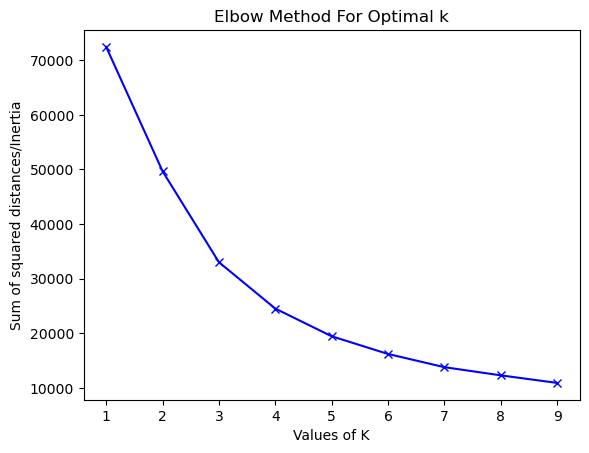

In [28]:
# plotting inertia 
plt.plot(K,sum_squared_distance,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

It appears that, n_clusters = 3 or n_clusters = 4 are the Elbow points.

In [29]:
# k-means (n=3) 
kmeans = KMeans(n_clusters=3, max_iter=1000)
y_clusters = kmeans.fit_predict(pca_df)

Clustered by PCA plot

In [30]:
pca_df["cluster"] = y_clusters
pca_df.groupby("cluster").count()

pca1  pca2
cluster            
0        1191  1191
1        6109  6109
2        1649  1649

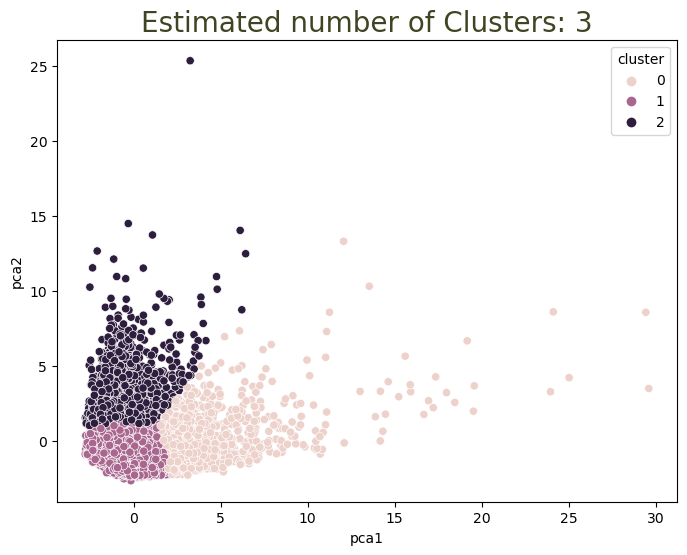

In [31]:
# Plot
plt.figure(figsize = (8,6))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df)
                               
plt.title('Estimated number of Clusters: 3', fontsize = 20, color='#414422')
plt.show()

Cluster plotted original df

In [32]:
df["cluster"] = y_clusters
df[["BALANCE","cluster"]].groupby("cluster").count()

BALANCE
cluster         
0           1191
1           6109
2           1649

In [33]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

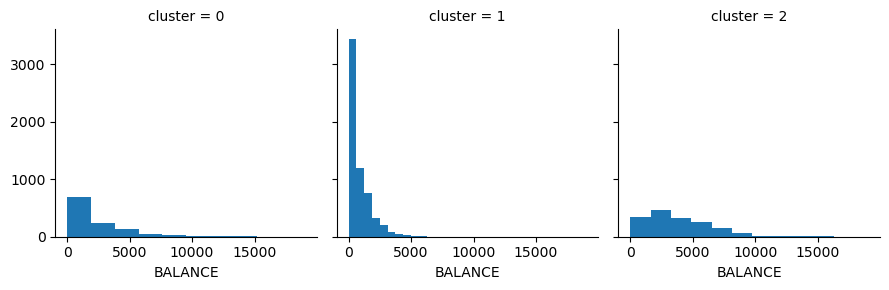

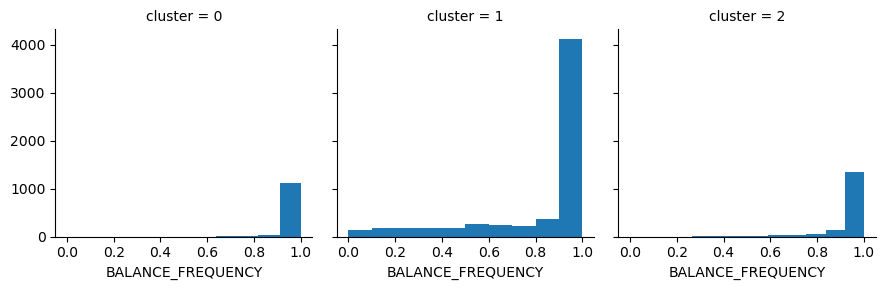

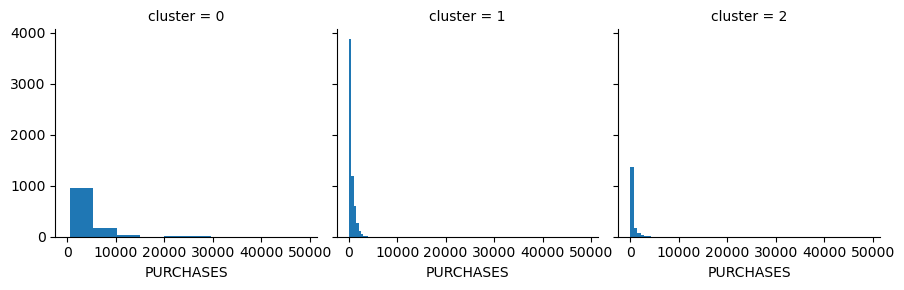

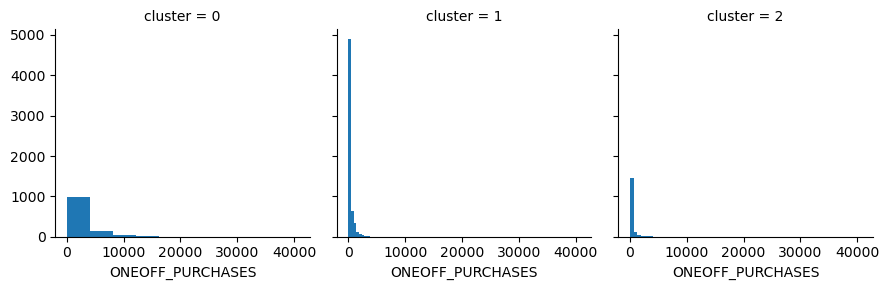

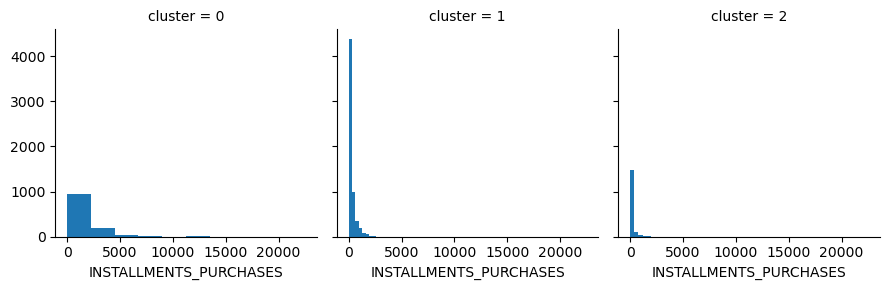

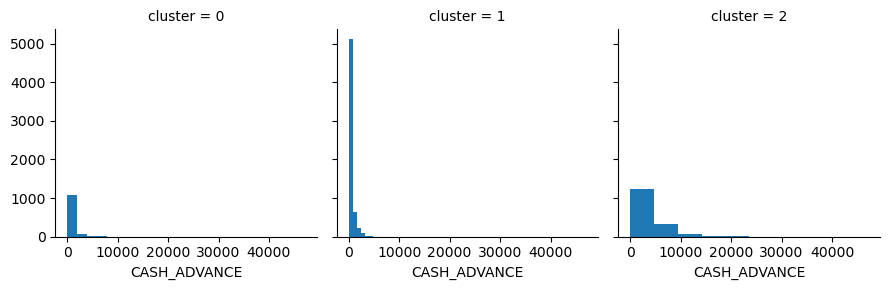

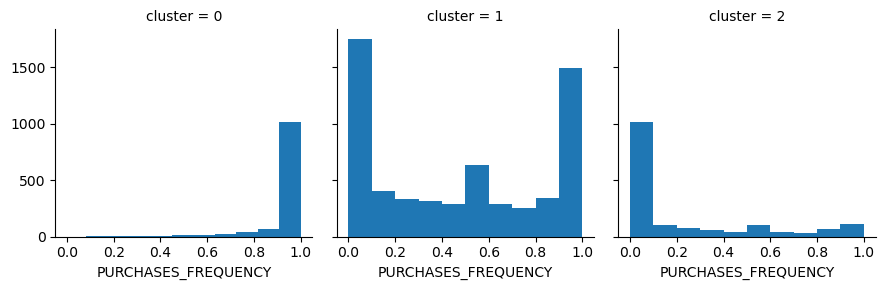

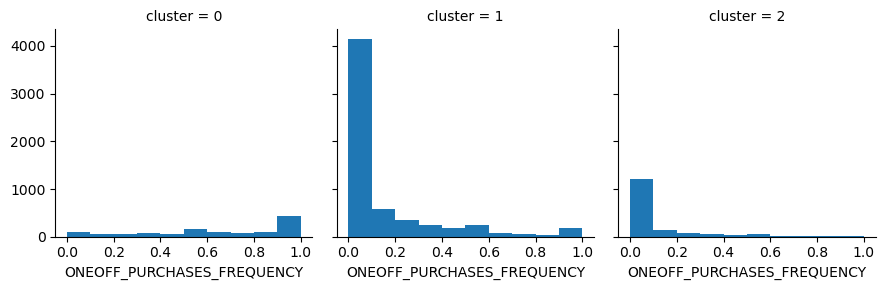

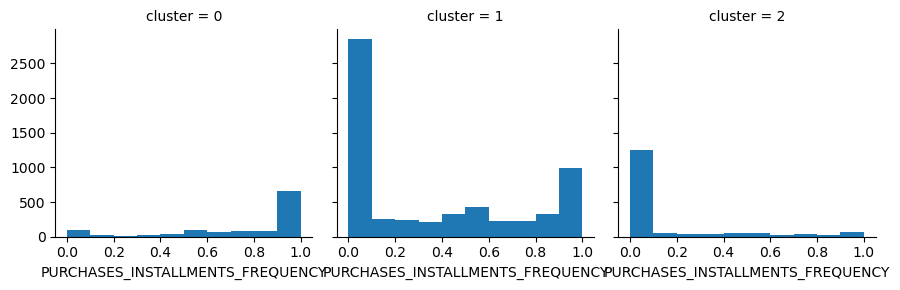

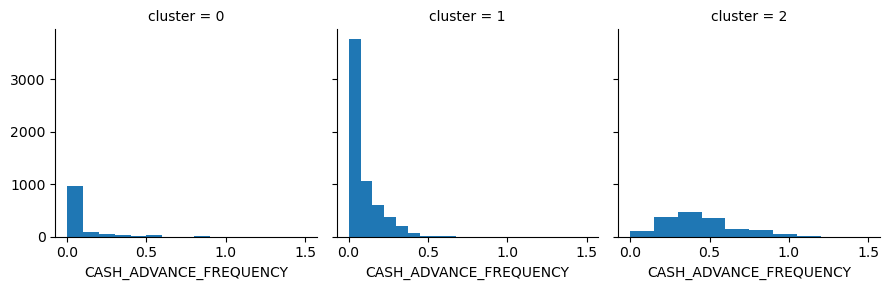

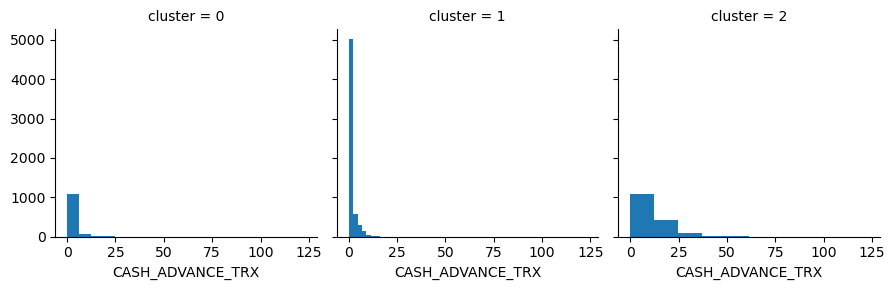

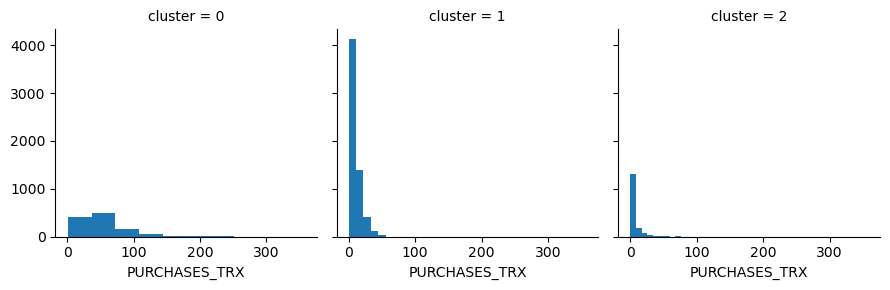

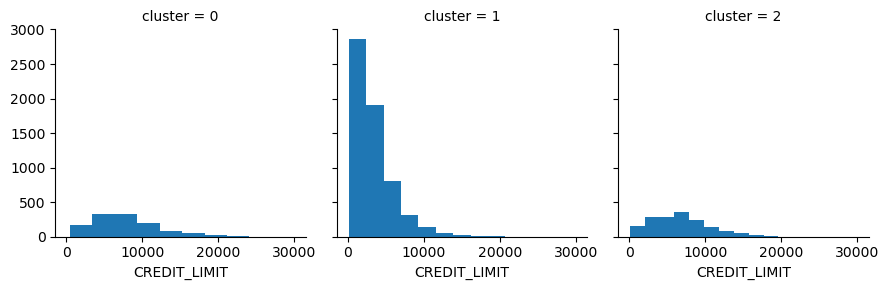

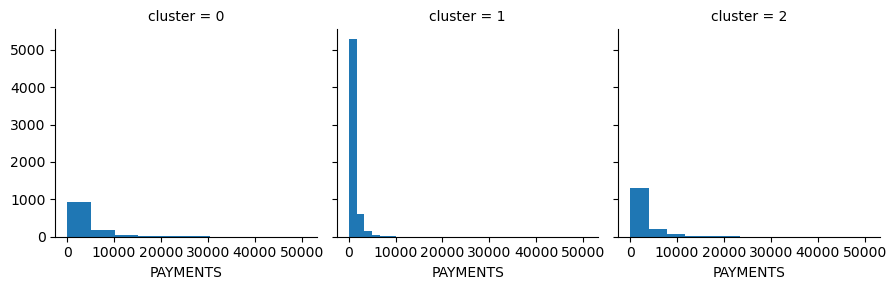

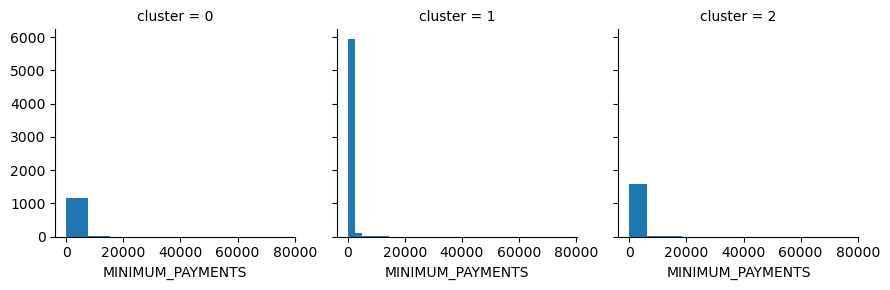

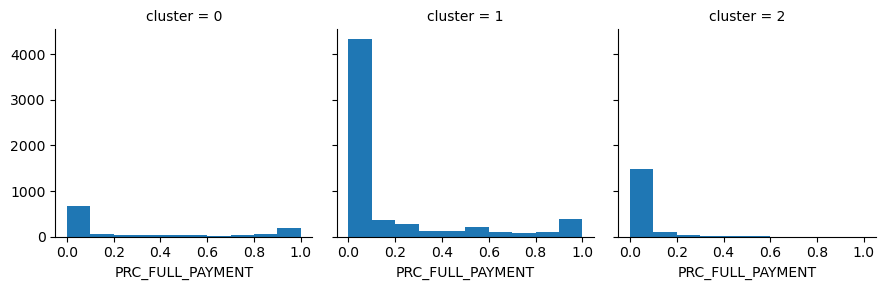

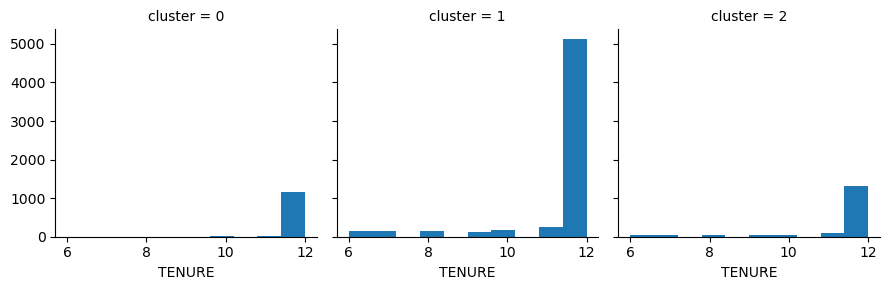

In [34]:
# Ploting credit limit vs cluster
for c in df[cols]:
    grid = sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

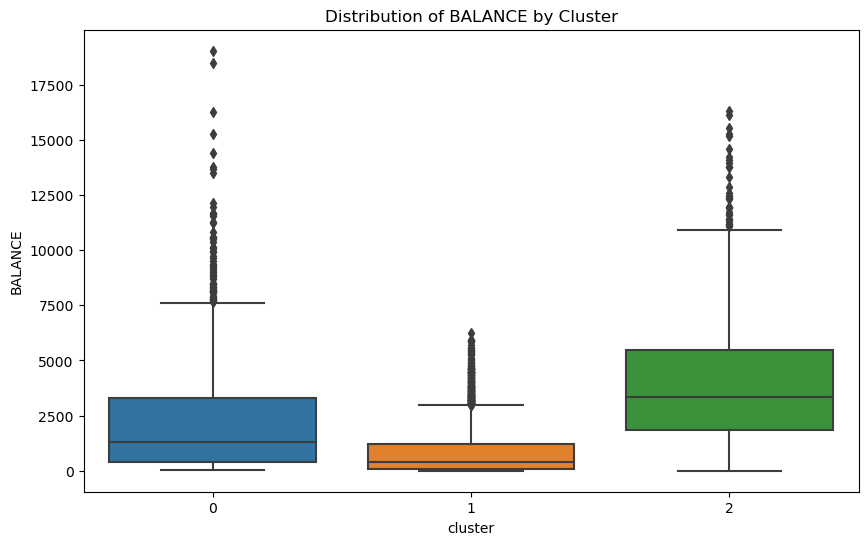

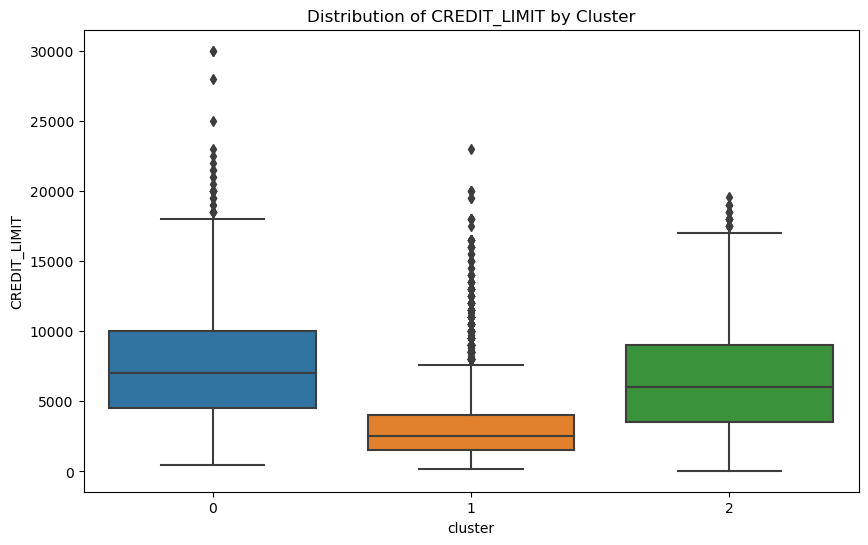

In [35]:
for col in df[["BALANCE", "CREDIT_LIMIT"]]:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(data=df, x='cluster', y=col)
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()

In [36]:
df[['MINIMUM_PAYMENTS',"cluster"]].groupby('cluster').mean()

MINIMUM_PAYMENTS
cluster                  
0             1305.634029
1              506.125953
2             1767.738919

<a id="findings"></a>
# Conclusions

* ### Cluster0: Customers with very low Balance on card and higher tendecy for cash in advance purchases
* ### Cluster1: Customers with highes Credit limit (Mean around 5.2K) and high purchase frequency
* ### Cluster3: Highest Balance with mean of 2,5K and high minimum payments (avg 1767,8 K)